In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

We will create image ( black coloured ) using np.zeros()

In [2]:
img = np.zeros((512,512,3))
cv2.imshow('window',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1] Creating shapes on the image

### (i) Rectangle


In [3]:
img = np.zeros((512,512,3))

rect = cv2.rectangle(img,pt1=(400,400),pt2=(100,100),color=(255,0,0),thickness=5)
# over here manage thickness and if it is -1 then it will fill color iin it

cv2.imshow('window',img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

### (ii) Circle

In [4]:
img = np.zeros((512,512,3))

circles = cv2.circle(img,center=(256,256),radius=200,color=(0,255,0),thickness=5)
# over here manage thickness and if it is -1 then it will fill color iin it

cv2.imshow('window',img)
cv2.waitKey(2000)
cv2.destroyAllWindows()


### (iii) Line

In [5]:
img = np.zeros((512,512,3))

lines = cv2.line(img,pt1=(256,492),pt2=(256,20),color=(0,0,255),thickness=5)
# over here manage thickness and if it is -1 then it will fill color in it

cv2.imshow('window',img)
cv2.waitKey(2000)
cv2.destroyAllWindows()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


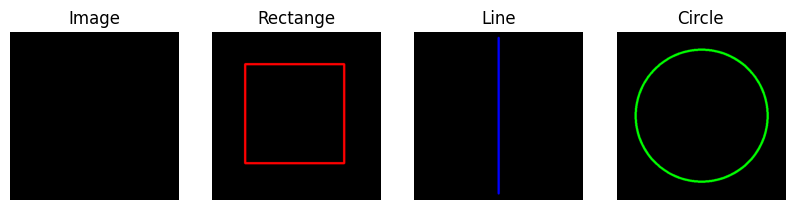

In [6]:
fig,ax = plt.subplots(1,4,figsize=(10,10))

img = np.zeros((512,512,3))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Image')

img = np.zeros((512,512,3))
rect = cv2.rectangle(img,pt1=(400,400),pt2=(100,100),color=(255,0,0),thickness=5)

img = np.zeros((512,512,3))
circles = cv2.circle(img,center=(256,256),radius=200,color=(0,255,0),thickness=5)

img = np.zeros((512,512,3))
lines = cv2.line(img,pt1=(256,492),pt2=(256,20),color=(0,0,255),thickness=5)

# over here manage thickness and if it is -1 then it will fill color in it



ax[1].imshow(rect)
ax[1].axis('off')
ax[1].set_title('Rectange')

ax[2].imshow(lines)
ax[2].axis('off')
ax[2].set_title('Line')

ax[3].imshow(circles)
ax[3].axis('off')
ax[3].set_title('Circle')
plt.show()

## 2] Inserting text on the image

In [7]:
img = np.zeros((512,512,3))
cv2.putText(img,org=(0,200),fontScale=4,color=(0,255,255),text='Hello',fontFace=None)

cv2.imshow('window',img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

here first a image will be opened and if you press 'a' it will display text ( 'Hello')

In [8]:
img = np.zeros((512,512,3))
cv2.imshow('window',img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()
elif k == ord('a'):
    cv2.putText(img,org=(10,50),fontScale=0.5,color=(0,255,255),text='Hello',fontFace=cv2.LINE_AA)
    cv2.imshow('window',img)
    cv2.waitKey(12000)
    cv2.destroyAllWindows() 

## 3] Events

#### (i) Press right click to insert circles or 'x' to exit


In [9]:
def draw(event,x,y,flags,params):
    if event ==  1:
        cv2.circle(img,center=(x,y),radius=50,color=(0,255,0),thickness=5)
    

In [10]:
cv2.namedWindow(winname='window')
cv2.setMouseCallback('window',draw)

img = np.ones((512,512,3))

while True:
    cv2.imshow('window',img)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cv2.destroyAllWindows()

#### (ii) Creating Rectangle of desired size

In [11]:
drawing = False
ix = -1
iy = -1


def draws(event,x,y,flags,params):
    global drawing, ix ,iy
    if event == 1:
        drawing = True
        ix = x
        iy = y
    
    elif event == 0:
        if drawing == True:
            cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(255,0,0),thickness=-1)
    
    elif event == 4:
        drawing = False
        cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(255,0,0),thickness=-1)

In [12]:
cv2.namedWindow(winname='window')
cv2.setMouseCallback('window',draws)

img = np.zeros((512,512,3))

while True:
    cv2.imshow('window',img)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cv2.destroyAllWindows()

## 4] Image Addition

#### mostly used for the image blending 

Text(0.5, 1.0, 'Blended ')

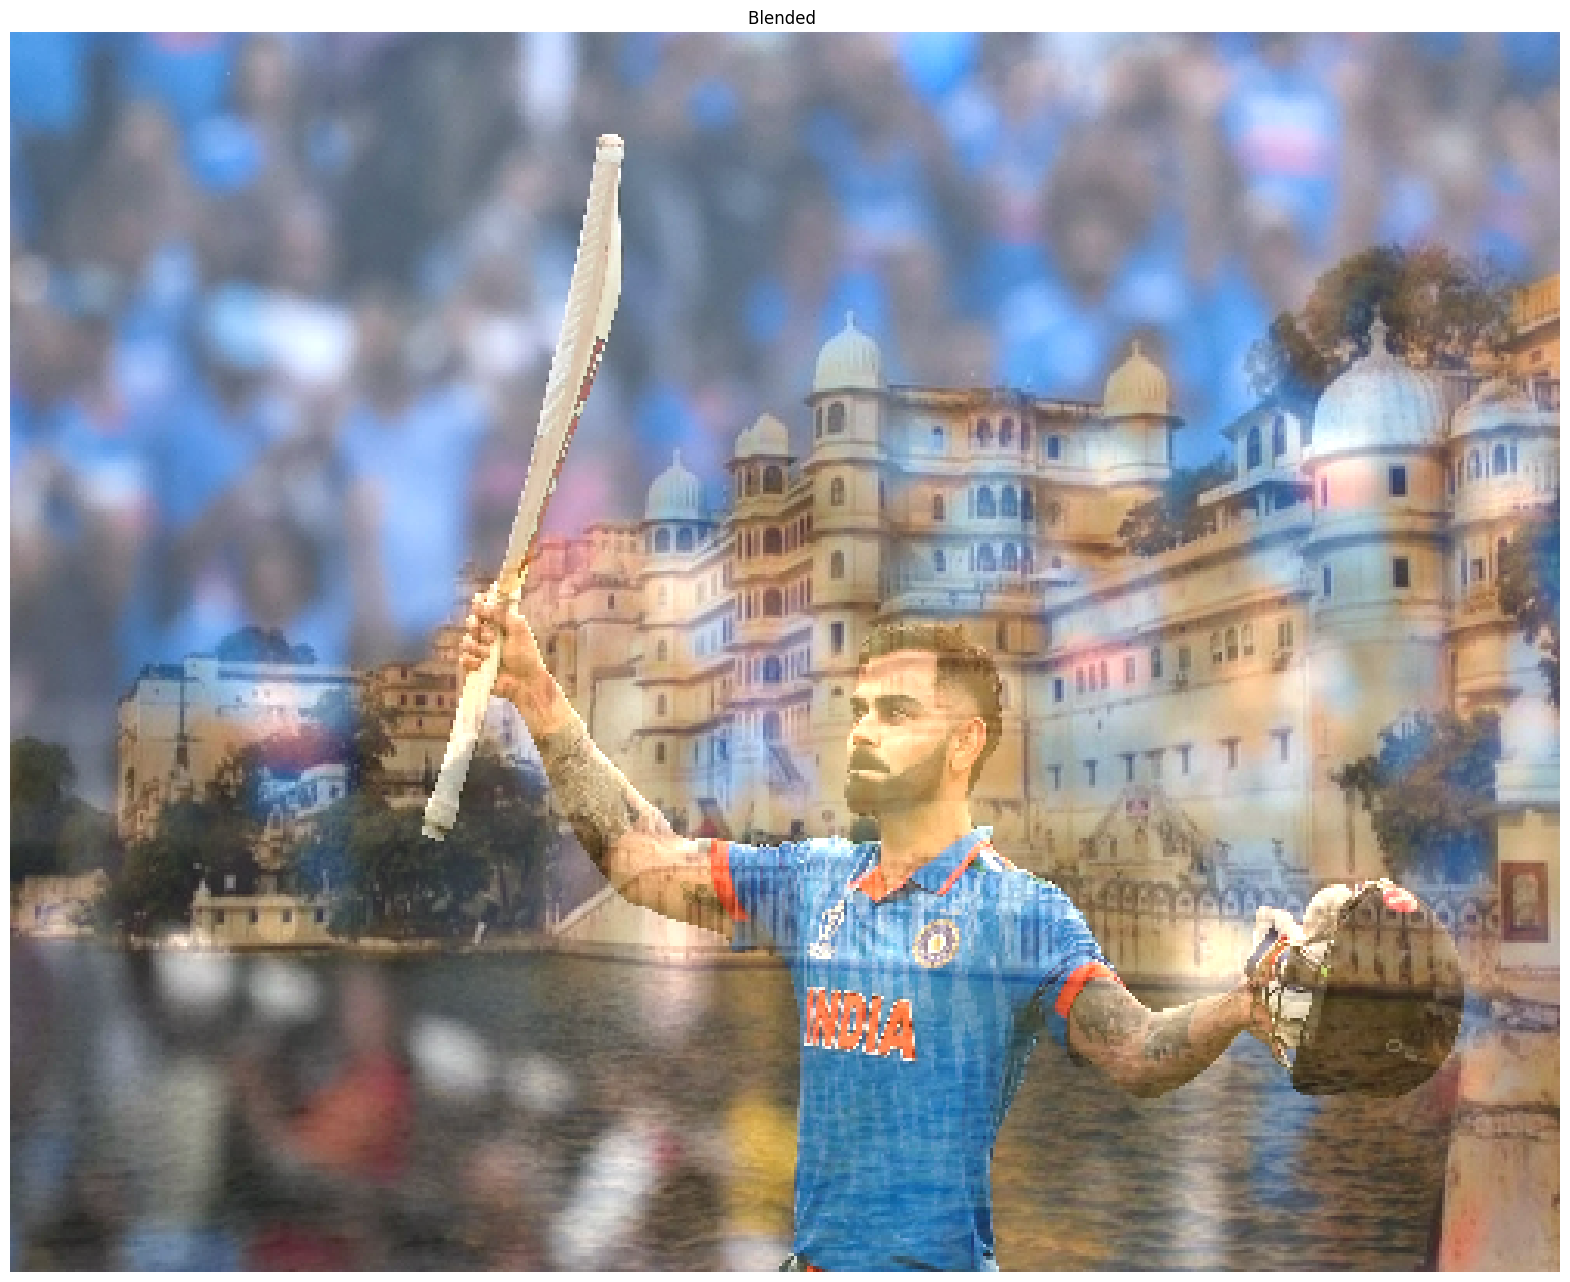

In [13]:
img1 = cv2.imread('saved/rj.jpg',1)
img2 = cv2.imread('saved/virat1.jpg',1)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1,(500,400))
img2 = cv2.resize(img2,(500,400))

# img3 = img1 + img2  # => image addition

dst = cv2.addWeighted(img1,0.5,img2,0.9,0)
fig ,ax =   plt.subplots(figsize=(20,20))


ax.imshow(dst)
ax.axis('off')  
ax.set_title('Blended ')


## 5] Bit-wise Operation 

In [14]:
img1 = cv2.imread('saved/rj.jpg',1)
img2 = cv2.imread('saved/messi2.png',1)

img1 = cv2.resize(img1,(500,400))
img2 = cv2.resize(img2,(100,80))
 
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
 
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
 
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
 
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
 
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
cv2.imshow('Image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Give Image Border

In [15]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

(-0.5, 258.5, 230.5, -0.5)

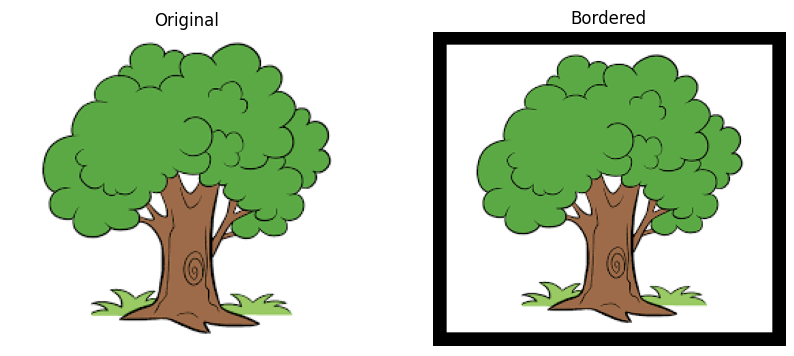

In [16]:

image = cv2.imread('saved/tree.jpg') 
c_image = image.copy()

c_image = cv2.copyMakeBorder(c_image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0) 
# c_image = cv2.copyMakeBorder(c_image, top, bottom, left , right, cv2.BORDER_CONSTANT, None, value = 0) 

cv2.imshow('Bordered Image', c_image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(image[:,:,::-1])
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(c_image[:,:,::-1])
ax[1].set_title('Bordered')
ax[1].axis('off')

In [17]:
image = cv2.imread('saved/tree.jpg') 


image = cv2.copyMakeBorder(image, 0, 120, 10, 10, cv2.BORDER_DEFAULT, None, value = 0) 
# image = cv2.copyMakeBorder(image, top, bottom, left , right, cv2.BORDER_CONSTANT, None, value = 0) 
cv2.imshow('Bordered Image', image) 
cv2.waitKey(0)
cv2.destroyAllWindows()